# A. Pengenalan

### Final Project 1
=== program Python for Data science Hacktiv8 x Kampus Merdeka, Kelompok 4 kelas KS18 ===
- Achmad Dhiaulhaq (PYTN-KS18-019)
- Dizqy Hidayat DM (PYTN-KS18-020)
- Naufal Fakhry Pratama (PYTN-KS18-014)

### Project overview :

- Latar belakang pemilihan kasus : 
dalam project ini pemilihan kasus didasari oleh penerapan pembalajaran yang sudah dipelajari pada program Python for Data Science Hacktiv8, unutk final project 1 yang ingin digapai adalah penerapan pembelajaran Regression dan Linear Regression.
- Dataset yang digunakan :
Sesuai intruksi dari program python for data science dari Hacktiv8 x Kampus Merdeka, untuk final project 1 menggunakan dataset yang sudah disediakan yaitu "Uber and Lyft Dataset Boston, MA". Data yang tersedia berukuran 367.38 MB dan berbentuk CSV yang mencakup 57 Kolom dan 693071 Baris untuk isinya.
- Objective yang ingin dicapai :
    - Memahami konsep regression dengan linear regression
    - Mampu mempersiapkan data untuk digunakan pada model linear regression
    - Dapat mengimplementasikan linear regression untuk membuat prediksi

- Hasil yang diharapkan :
    - Prediksi harga yang sesuai berdasarkan variabel yang ada pada dataset. 


## B. Import pustaka yang dibutuhkan

tahap ini dilakukan pengimportan library yang dibutuhkan seperti pandas,numpy,Sklearn, dan lainnya.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor

import joblib



pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

## C. Data Loading

Data loading merupakan proses memuat dataset kedalam notebook untuk dilakukan analisa dan develop machine learning

In [2]:
# loading data berbentuk csv dengan library pandas dan di convert menjadi dataframe
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.21,-71.03,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.00,0.00,0.68,8.66,9.17,1545015600,10.00,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.00,303.80,1544962084,1544994864,0.30,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.68,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,42.21,-71.03,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.13,1.00,0.94,11.98,11.98,1543291200,4.79,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.79,291.10,1543232969,1543266992,0.64,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.20,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,42.21,-71.03,38.33,32.93,Clear,Light rain in the morning.,0.00,0.00,0.75,7.33,7.33,1543334400,10.00,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.00,315.70,1543319437,1543353364,0.68,0.11,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.75,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.00,42.21,-71.03,34.38,29.63,Clear,Partly cloudy throughout the day.,0.00,0.00,0.73,5.28,5.28,1543514400,10.00,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.00,291.10,1543492370,1543526114,0.75,0.00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.22,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,42.21,-71.03,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.70,9.14,9.14,1543446000,10.00,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.00,347.70,1543405904,1543439738,0.72,0.00,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.00,1.00,42.35,-71.06,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.00,0.00,0.74,2.34,2.87,1543672800,9.79,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.79,271.50,1543665331,1543698855,0.82,0.00,1543

In [3]:
# menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
# menampilkan stastistik deskriptif dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.00,1544045709.76,689192.49,1543203646.00,1543443968.00,1543737478.00,1544827509.00,1545160511.00
hour,693071.00,11.62,6.95,0.00,6.00,12.00,18.00,23.00
day,693071.00,17.79,9.98,1.00,13.00,17.00,28.00,30.00
month,693071.00,11.59,0.49,11.00,11.00,12.00,12.00,12.00
price,637976.00,16.55,9.32,2.50,9.00,13.50,22.50,97.50
distance,693071.00,2.19,1.14,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071.00,1.01,0.09,1.00,1.00,1.00,1.00,3.00
latitude,693071.00,42.34,0.05,42.21,42.35,42.35,42.36,42.37
longitude,693071.00,-71.07,0.02,-71.11,-71.08,-71.06,-71.05,-71.03
temperature,693071.00,39.58,6.73,18.91,36.45,40.49,43.58,57.22


In [5]:
#menampilkan stastistik deskriptif untuk kolom-kolom yang bertipe data object atau string

df.describe(include=object).T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


## D. Data Cleaning

Data Cleaning dilakukan untuk membersihkan dan mempersiapkan data sehingga dapat diolah dengan benar dalam analisis data. Proses ini melibatkan identifikasi, penanganan, dan perbaikan masalah atau ketidaksesuaian dalam data yang dapat mempengaruhi hasil analisis.

=======================================================================
#### #Tempat pengecekan isi dari kolom untuk selanjutnya diputuskan untuk dipakai atau dihapus
=======================================================================

In [6]:
df['surge_multiplier'].unique()


array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [7]:
df['name'].unique()


array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [8]:
df['precipIntensity'].unique()

array([0.    , 0.1299, 0.0246, 0.0624, 0.0567, 0.0036, 0.007 , 0.1088,
       0.0341, 0.0308, 0.0094, 0.0013, 0.0053, 0.002 , 0.1264, 0.0216,
       0.005 , 0.008 , 0.0288, 0.0488, 0.0074, 0.0017, 0.0023, 0.0274,
       0.0015, 0.0031, 0.0923, 0.092 , 0.0187, 0.0006, 0.1267, 0.1289,
       0.0005, 0.0016, 0.0003, 0.0024, 0.1058, 0.0255, 0.0021, 0.0121,
       0.0071, 0.1447, 0.0813, 0.0674, 0.0342, 0.0025, 0.0012, 0.0801,
       0.0049, 0.0772, 0.0737, 0.001 , 0.0591, 0.0089, 0.0002, 0.0832,
       0.0462, 0.0057, 0.0701, 0.0786, 0.0092, 0.0009, 0.1044])

In [9]:
df['icon'].value_counts()

 cloudy                  218895
 partly-cloudy-night     158030
 partly-cloudy-day       115404
 rain                    104556
 clear-night              60294
 clear-day                26832
 fog                       9060
Name: icon, dtype: int64

In [10]:
df['long_summary'].nunique()

11

In [11]:
# melihat isi 'short_summary'dan 'long_summary'
df.groupby(['short_summary', 'long_summary'])['hour'].count()

short_summary       long_summary                                        
 Clear               Foggy in the morning.                                   3744
                     Light rain in the morning and overnight.                3744
                     Light rain in the morning.                              3900
                     Mostly cloudy throughout the day.                      34632
                     Partly cloudy throughout the day.                      37362
                     Rain throughout the day.                                3744
 Drizzle             Light rain in the morning.                              5616
                     Rain until morning, starting again in the evening.      1680
 Foggy               Foggy in the morning.                                   5616
                     Rain in the morning and afternoon.                        84
                     Rain until morning, starting again in the evening.      3360
 Light Rain          Ligh

### - Menghapus Kolom tidak terpakai

ada beberapa kolom yang tidak terpakai dalam project ini, maka dari itu akan dilakukan pembersihan/penghapusan pada kolom tersebut.
kolom yang akan di hapus yaitu :
 ('id', 'timezone', 'apparentTemperatureMaxTime', 'apparentTemperatureMinTime', 'temperatureMaxTime', 'temperatureMinTime',
    'uvIndexTime', 'sunsetTime', 'sunriseTime', 'apparentTemperatureLowTime', 'apparentTemperatureHighTime', 'temperatureLowTime',
    'temperatureHighTime', 'windGustTime', 'timestamp')

#### Alasan penghapusan kolom tersebut adalah :
- id : kolom id berisikan karakter unik untuk setiap transaksi yang ada, dan itu tidak dibutuhkan dalam analisa & pembuatan machine learning di project ini
- timezone :
- Kolom yang mengandung kata 'apparent' dan 'temperature' : dalam proses develop project ini hanya menggunakan kolom 'temperature' saja, jadi kolom lainnya tidak dibutuhkan dan dapat dihapus.
- datetime : dalam dataset kolom datetime sudah disebar lebih rinci yaitu pada kolom hour,day, dan mounth 
- timestamp : tidak dipergunakan pada project maka bisa dubersihkan/hapus
- dan kolom kolom yang tidak relevan dengan objektif yang ingin digapai akan dibersihkan/dihapus 

In [12]:
# proses penegelompokan kolom dengan kondisi tertentu yang ingin dihapus
lst_remove_temp = df.filter(regex='temperature|apparent', axis=1).columns.to_list()
lst_remove_temp.remove('temperature')
lst_remove_temp

['apparentTemperature',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [13]:
#menghapus kolom yang tidak dibutuhkan
df = df.drop(columns=['id', 'timezone','uvIndexTime', 'sunsetTime', 'sunriseTime', 'windGustTime', 'timestamp','long_summary', 'icon', 'latitude', 'longitude','datetime'])
df = df.drop(columns=lst_remove_temp)
df.sample(5)

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
217643,9,28,11,Back Bay,Boston University,Lyft,lyft_lux,Lux Black,19.50,1.47,1.00,34.26,Partly Cloudy,0.00,0.00,0.79,4.54,7.00,9.92,28.36,991.12,252,0.25,0,9.92,343.80,0.72,0.00
215070,10,30,11,South Station,West End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.50,1.89,1.00,29.68,Clear,0.00,0.00,0.85,3.03,3.03,9.88,25.64,1015.68,296,0.00,0,9.88,281.40,0.79,0.00
592132,21,13,12,Fenway,Theatre District,Lyft,lyft_line,Shared,7.00,2.75,1.00,32.60,Mostly Cloudy,0.00,0.00,0.58,1.87,3.49,10.00,19.30,1034.39,130,0.71,0,10.00,328.90,0.21,0.00
121900,21,29,11,North Station,South Station,Lyft,lyft_line,Shared,5.00,1.75,1.00,41.97,Partly Cloudy,0.00,0.00,0.55,10.00,15.17,9.78,26.82,1008.97,310,0.31,0,9.78,305.70,0.75,0.00
445940,15,27,11,Beacon Hill,South Station,Lyft,lyft_line,Shared,3.50,2.38,1.00,40.49,Overcast,0.00,0.15,0.89,10.42,14.77,5.01,37.50,989.46,247,1.00,1,5.01,335.70,0.68,0.14


In [14]:
df.sample()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
500003,18,28,11,West End,Haymarket Square,Lyft,lyft_luxsuv,Lux Black XL,27.50,0.78,1.00,40.92,Overcast,0.00,0.00,0.64,9.21,15.03,10.00,29.57,991.21,296,1.00,1,10.00,353.10,0.72,0.00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                693071 non-null  int64  
 1   day                 693071 non-null  int64  
 2   month               693071 non-null  int64  
 3   source              693071 non-null  object 
 4   destination         693071 non-null  object 
 5   cab_type            693071 non-null  object 
 6   product_id          693071 non-null  object 
 7   name                693071 non-null  object 
 8   price               637976 non-null  float64
 9   distance            693071 non-null  float64
 10  surge_multiplier    693071 non-null  float64
 11  temperature         693071 non-null  float64
 12  short_summary       693071 non-null  object 
 13  precipIntensity     693071 non-null  float64
 14  precipProbability   693071 non-null  float64
 15  humidity            693071 non-nul

### D.1 Outlier

outlier adalah data yang memiliki karakteristik yang berbeda jauh dari observasi-observasi lainnya dan muncul dalam bentuk nilai ekstrim baik untuk variabel tunggal atau variabel kombinasi.
da ini akan sangat berpengaruh pada hasil analisa dan juga kualitasi model machine learning, maka dari itu outlier harus ditangani terlebih dahulu.

#### a. Outlier "PRICE"

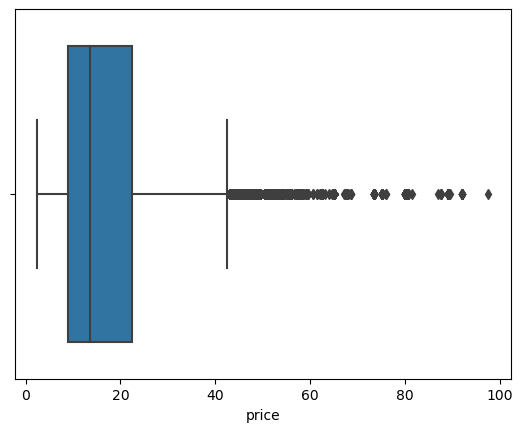

In [16]:
# ini adalah salah satu cara melihat outlier pada data (*overall data)
sns.boxplot(x='price', data=df)
plt.show()

In [17]:
# menentukan batasan pada data sebagai observasi outlier (*overall data)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print ("Q1 =", Q1)
print ("Q3 =", Q3)
print ("IQR =", IQR)
print ("lower bound =", lower_bound)
print ("Upper bound =", upper_bound)


Q1 = 9.0
Q3 = 22.5
IQR = 13.5
lower bound = -11.25
Upper bound = 42.75


In [18]:
outliersALL = df[df['price'] > upper_bound]
outliersALL.head(3)

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
706,10,28,11,South Station,Back Bay,Lyft,lyft_lux,Lux Black,52.50,3.25,2.00,34.40,Partly Cloudy,0.00,0.00,0.78,4.89,7.74,9.90,28.39,991.05,259,0.48,0,9.90,344.70,0.72,0.00
707,2,16,12,South Station,Back Bay,Lyft,lyft_luxsuv,Lux Black XL,67.50,3.25,2.00,40.87,Partly Cloudy,0.00,0.00,0.70,4.68,5.77,9.83,32.00,1024.46,36,0.14,0,9.83,296.60,0.27,0.01
769,17,14,12,Theatre District,Boston University,Lyft,lyft_luxsuv,Lux Black XL,45.50,4.76,1.00,44.89,Partly Cloudy,0.00,0.00,0.54,3.73,3.73,9.96,29.03,1030.83,167,0.16,1,9.96,289.10,0.24,0.00


setelah dilakukan analisa, didapati sebuah insight bahwa company rideshare dari Lyft dan Uber memiliki beberapa kategori layanan seperti layanan Premium dan juga layanan Reguler.
maka dari itu untuk mengidentifikasi outlier harus dilakukan pengkategorisasian terlebih dahulu berdasarkan layanan premium atau reguler. berikut adalah list kategori berdasarkan tipe layanan:

Premium :
- Lux (Lyft)
- Lux Black XL (Lyft)
- Lux Black (Lyft)
- Black (Uber)
- Black SUV (Uber)

Reguler :
- Shared (Lyft)
- Lyft
- Lyft XL
- WAV (Lyft)
- UberX
- UberXL
- UberPool
- Taxi (Uber)

selanjutnya adalah melakukan identifikasi outlier berdasarkan kategori yang sudah ditentukan. 


In [19]:
# list data dengan kategori layanan Premium
premium_df = df[df['name'].isin(['Lux', 'Lux Black XL', 'Lux Black', 'Black', 'Black SUV'])]
premium_df.head(3)

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,43.58,Rain,0.13,1.00,0.94,11.98,11.98,4.79,41.83,1003.97,90,1.00,0,4.79,291.10,0.64,0.13
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.00,34.38,Clear,0.00,0.00,0.73,5.28,5.28,10.00,26.64,1013.73,310,0.00,0,10.00,291.10,0.75,0.00
5,18,17,12,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.50,0.44,1.00,38.75,Overcast,0.00,0.00,0.84,7.19,8.88,8.32,34.41,1000.46,294,1.00,1,8.32,335.80,0.33,0.02


In [20]:
# list data dengan kategori layanan Reguler
reguler_df = df[df['name'].isin(['Shared', 'Lyft', 'Lyft XL','UberXL', 'UberX', 'WAV', 'UberPool', 'Taxi'])]
reguler_df.head(3)

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.34,Mostly Cloudy,0.00,0.00,0.68,8.66,9.17,10.00,32.70,1021.98,57,0.72,0,10.00,303.80,0.30,0.13
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,38.33,Clear,0.00,0.00,0.75,7.33,7.33,10.00,31.10,992.28,240,0.03,0,10.00,315.70,0.68,0.11
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,37.44,Partly Cloudy,0.00,0.00,0.70,9.14,9.14,10.00,28.61,998.36,303,0.44,0,10.00,347.70,0.72,0.00


In [21]:
surg_reg = reguler_df[reguler_df['surge_multiplier'].astype(float).isin([1.0, 1.5, 1.25])]
surg_reg.sample(3)

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
198627,16,26,11,Boston University,Financial District,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,17.50,4.44,1.00,45.80,Overcast,0.00,0.29,0.89,4.10,4.30,9.58,42.84,1013.62,115,1.00,1,9.58,293.70,0.64,0.12
196990,9,30,11,Beacon Hill,South Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,19.50,2.48,1.00,30.04,Clear,0.00,0.00,0.85,3.02,3.02,9.89,26.11,1015.25,311,0.00,0,9.89,282.90,0.79,0.00
482443,6,18,12,Theatre District,South Station,Lyft,lyft_plus,Lyft XL,9.00,0.62,1.00,33.71,Overcast,0.00,0.11,0.65,11.05,20.20,5.86,23.09,1001.28,314,1.00,0,5.86,362.10,0.37,0.00


In [22]:
surg_reg[surg_reg['name'].isin(['Lyft XL'])]

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,37.44,Partly Cloudy,0.00,0.00,0.70,9.14,9.14,10.00,28.61,998.36,303,0.44,0,10.00,347.70,0.72,0.00
6,5,26,11,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.50,1.08,1.00,41.99,Overcast,0.00,0.00,0.91,0.53,0.88,4.67,39.54,1014.11,91,1.00,0,4.67,312.30,0.64,0.12
19,6,16,12,North Station,Haymarket Square,Lyft,lyft_plus,Lyft XL,11.00,0.72,1.00,40.36,Clear,0.00,0.00,0.69,7.08,8.47,10.00,30.94,1022.94,52,0.06,0,10.00,298.70,0.30,0.12
36,0,14,12,North Station,Northeastern University,Lyft,lyft_plus,Lyft XL,16.50,3.24,1.00,31.25,Overcast,0.00,0.00,0.64,2.62,3.54,10.00,20.53,1035.06,173,0.91,0,10.00,326.70,0.21,0.00
48,10,27,11,North Station,South Station,Lyft,lyft_plus,Lyft XL,13.50,1.76,1.00,45.45,Light Rain,0.06,1.00,0.93,6.87,7.42,2.69,43.52,989.98,79,1.00,0,2.69,296.20,0.68,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693012,17,29,11,Northeastern University,Beacon Hill,Lyft,lyft_plus,Lyft XL,13.50,2.44,1.00,43.91,Partly Cloudy,0.00,0.00,0.50,11.24,22.48,9.97,26.27,1006.58,312,0.31,1,9.97,314.00,0.75,0.00
693021,3,3,12,North End,Back Bay,Lyft,lyft_plus,Lyft XL,19.50,2.88,1.00,48.12,Overcast,0.00,0.10,0.95,2.56,2.56,4.73,46.76,1002.35,294,1.00,0,4.73,287.80,0.86,0.11
693033,3,14,12,Northeastern University,Beacon Hill,Lyft,lyft_plus,Lyft XL,13.50,2.44,1.00,31.57,Overcast,0.00,0.00,0.69,1.35,2.01,10.00,22.45,1035.00,187,1.00,0,10.00,316.30,0.21,0.00
693040,1,29,11,North End,Beacon Hill,Lyft,lyft_plus,Lyft XL,13.50,1.81,1.00,38.42,Mostly Cloudy,0.00,0.00,0.72,8.41,11.54,9.91,30.30,996.92,297,0.77,0,9.91,349.90,0.72,0.00


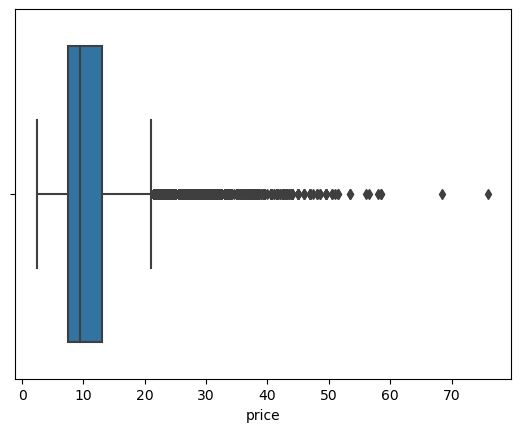

In [23]:
sns.boxplot(x='price', data=surg_reg)
plt.show()

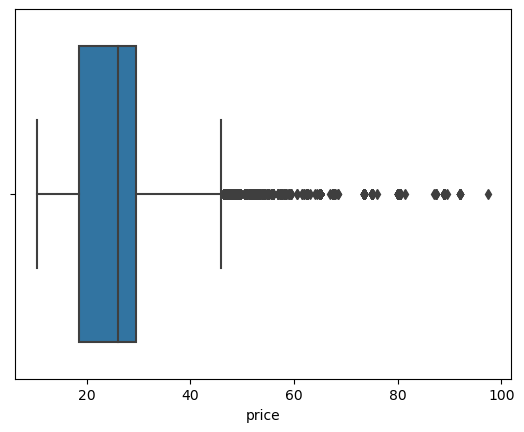

In [24]:
# identifikasi Outlier pada layanan Premium
sns.boxplot(x='price', data=premium_df)
plt.show()


In [25]:
# menentukan batasan pada data sebagai observasi outlier (*layanan premium)
Q1_prem = premium_df['price'].quantile(0.25)
Q3_prem = premium_df['price'].quantile(0.75)
IQR_prem = Q3_prem - Q1_prem
lower_bound_prem = Q1_prem - 1.5 * IQR_prem
upper_bound_prem = Q3_prem + 1.5 * IQR_prem

print ("Q1 =", Q1_prem)
print ("Q3 =", Q3_prem)
print ("IQR =", IQR_prem)
print ("lower bound =", lower_bound_prem)
print ("Upper bound =", upper_bound_prem)

Q1 = 18.5
Q3 = 29.5
IQR = 11.0
lower bound = 2.0
Upper bound = 46.0


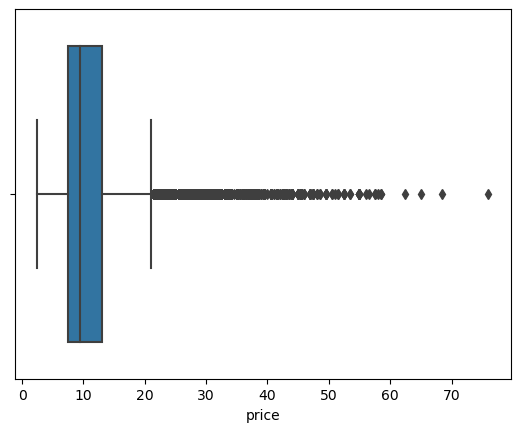

In [26]:
# identifikasi Outlier pada layanan Premium
sns.boxplot(x='price', data=reguler_df)
plt.show()

In [27]:
# menentukan batasan pada data sebagai observasi outlier (*layanan reguler)
Q1_reg = reguler_df['price'].quantile(0.25)
Q3_reg = reguler_df['price'].quantile(0.75)
IQR_reg = Q3_reg - Q1_reg
lower_bound_reg = Q1_reg - 1.5 * IQR_reg
upper_bound_reg = Q3_reg + 1.5 * IQR_reg

print ("Q1 =", Q1_reg)
print ("Q3 =", Q3_reg)
print ("IQR =", IQR_reg)
print ("lower bound =", lower_bound_reg)
print ("Upper bound =", upper_bound_reg)

Q1 = 7.5
Q3 = 13.0
IQR = 5.5
lower bound = -0.75
Upper bound = 21.25


#### Kesimpulan untuk Outlier:

Kelompok 4 memutuskan untuk tidak menghapus outlier yang ada, setelah dilakukannya identifikasi dengan boxplot dan Quantile serta melakukan pengkategorisasian data tertentu didapati bahwa Outlier yang ada merupakan data yang valid dan bukan data yang salah.

- alasannya : Company rideshare Uber dan Lyft memiliki layanan premium dan juga reguler yang memiliki perbedaan harga yang signifikan, kemudian adanya variabel pendukung lainnya yang membuat harga dari layanan rideshare ini memiliki perbedaan yang cukup jauh dari range quantile , misalnya adalah adanya faktor dari kolom 'surge_multiplier'.

Surge multiplier, dalam konteks layanan ride-sharing seperti Lyft dan Uber, merujuk pada peningkatan harga tarif selama periode tingkat permintaan tinggi misalnya jam kerja atau sebagainya. surge_multiplier memengaruhi harga akhir dari layanan rideshare karena peningkatan harga dilakukan dengan mengkalikan harga yang sudah ditentukan dengan surge_multiplier ini.

##### = maka kesimpulan yang didapat adalah outlier pada kolom "PRICE" adalah data yang valid dan tidak perlu dihapus. =

### D.2 Handling Missing Value dan Duplicate Data

missing value merupakan data yang hilang dan harus diidentifikasi untuk penanganannya. 
begitu juga data yang duplikat harus dilakukan penanganan berupa penghapusan data yang terduplikasi.

In [28]:
# Handling Duplicates Data
df = df.drop_duplicates()
df.shape

(615008, 28)

In [29]:
#cek missing value dari dataset
pd.DataFrame(df.isna().sum())

,0
hour,0
day,0
month,0
source,0
destination,0
cab_type,0
product_id,0
name,0
price,32942
distance,0


dalam objektif project ini di fokuskan kepada kolom "price", maka dari itu jika ada missing value dari kolom harga maka tidak dilakukan penghapusan.

In [30]:
# Kolom Price ditangguhkan untuk proses penanganan missing value
df = df[df['price'].notna()]
df.isna().any()

hour                  False
day                   False
month                 False
source                False
destination           False
cab_type              False
product_id            False
name                  False
price                 False
distance              False
surge_multiplier      False
temperature           False
short_summary         False
precipIntensity       False
precipProbability     False
humidity              False
windSpeed             False
windGust              False
visibility            False
dewPoint              False
pressure              False
windBearing           False
cloudCover            False
uvIndex               False
visibility.1          False
ozone                 False
moonPhase             False
precipIntensityMax    False
dtype: bool

## E. Explorasi Data
adalah proses analisis data yang bertujuan untuk memahami karakteristik, pola, dan informasi yang terkandung dalam dataset.

### E.1 Query
dalam pengqueryan di EDA mengacu pada pertanyaan atau pernyataan yang diajukan oleh seorang analis data untuk menggali informasi dari dataset.
dalam project ini pengquery-an dapat dijawab melalui sintaks statistik deskriptif yang dapat memberikan informasi tentang data yang ada

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,582066.00,11.61,6.94,0.00,6.00,12.00,18.00,23.00
day,582066.00,17.62,9.98,1.00,13.00,17.00,27.00,30.00
month,582066.00,11.60,0.49,11.00,11.00,12.00,12.00,12.00
price,582066.00,16.77,9.44,2.50,9.00,14.00,22.50,97.50
distance,582066.00,2.22,1.14,0.02,1.31,2.19,2.96,7.86
surge_multiplier,582066.00,1.02,0.10,1.00,1.00,1.00,1.00,3.00
temperature,582066.00,39.57,6.78,18.91,36.45,40.49,43.61,57.22
precipIntensity,582066.00,0.01,0.03,0.00,0.00,0.00,0.00,0.14
precipProbability,582066.00,0.15,0.33,0.00,0.00,0.00,0.00,1.00
humidity,582066.00,0.74,0.14,0.38,0.64,0.71,0.88,0.96


### E.2 Grouping

Grouping merujuk pada proses pengelompokan data berdasarkan suatu kriteria tertentu untuk memahami karakteristik atau tren dalam setiap kelompok.

In [32]:
#grouping data berdasarkan distance
data_group = df.groupby('distance')
data_group['price'].mean()

distance
0.02   11.85
0.03   11.79
0.04   12.00
0.12   12.00
0.17   11.58
        ... 
7.45   26.00
7.46   27.57
7.50   28.47
7.62   28.25
7.86   27.83
Name: price, Length: 549, dtype: float64

### E.3 Visualisasi dalam EDA

visualisasi memberikan gambaran visual menggunakan grafik yang merepresentasikan data yang ada

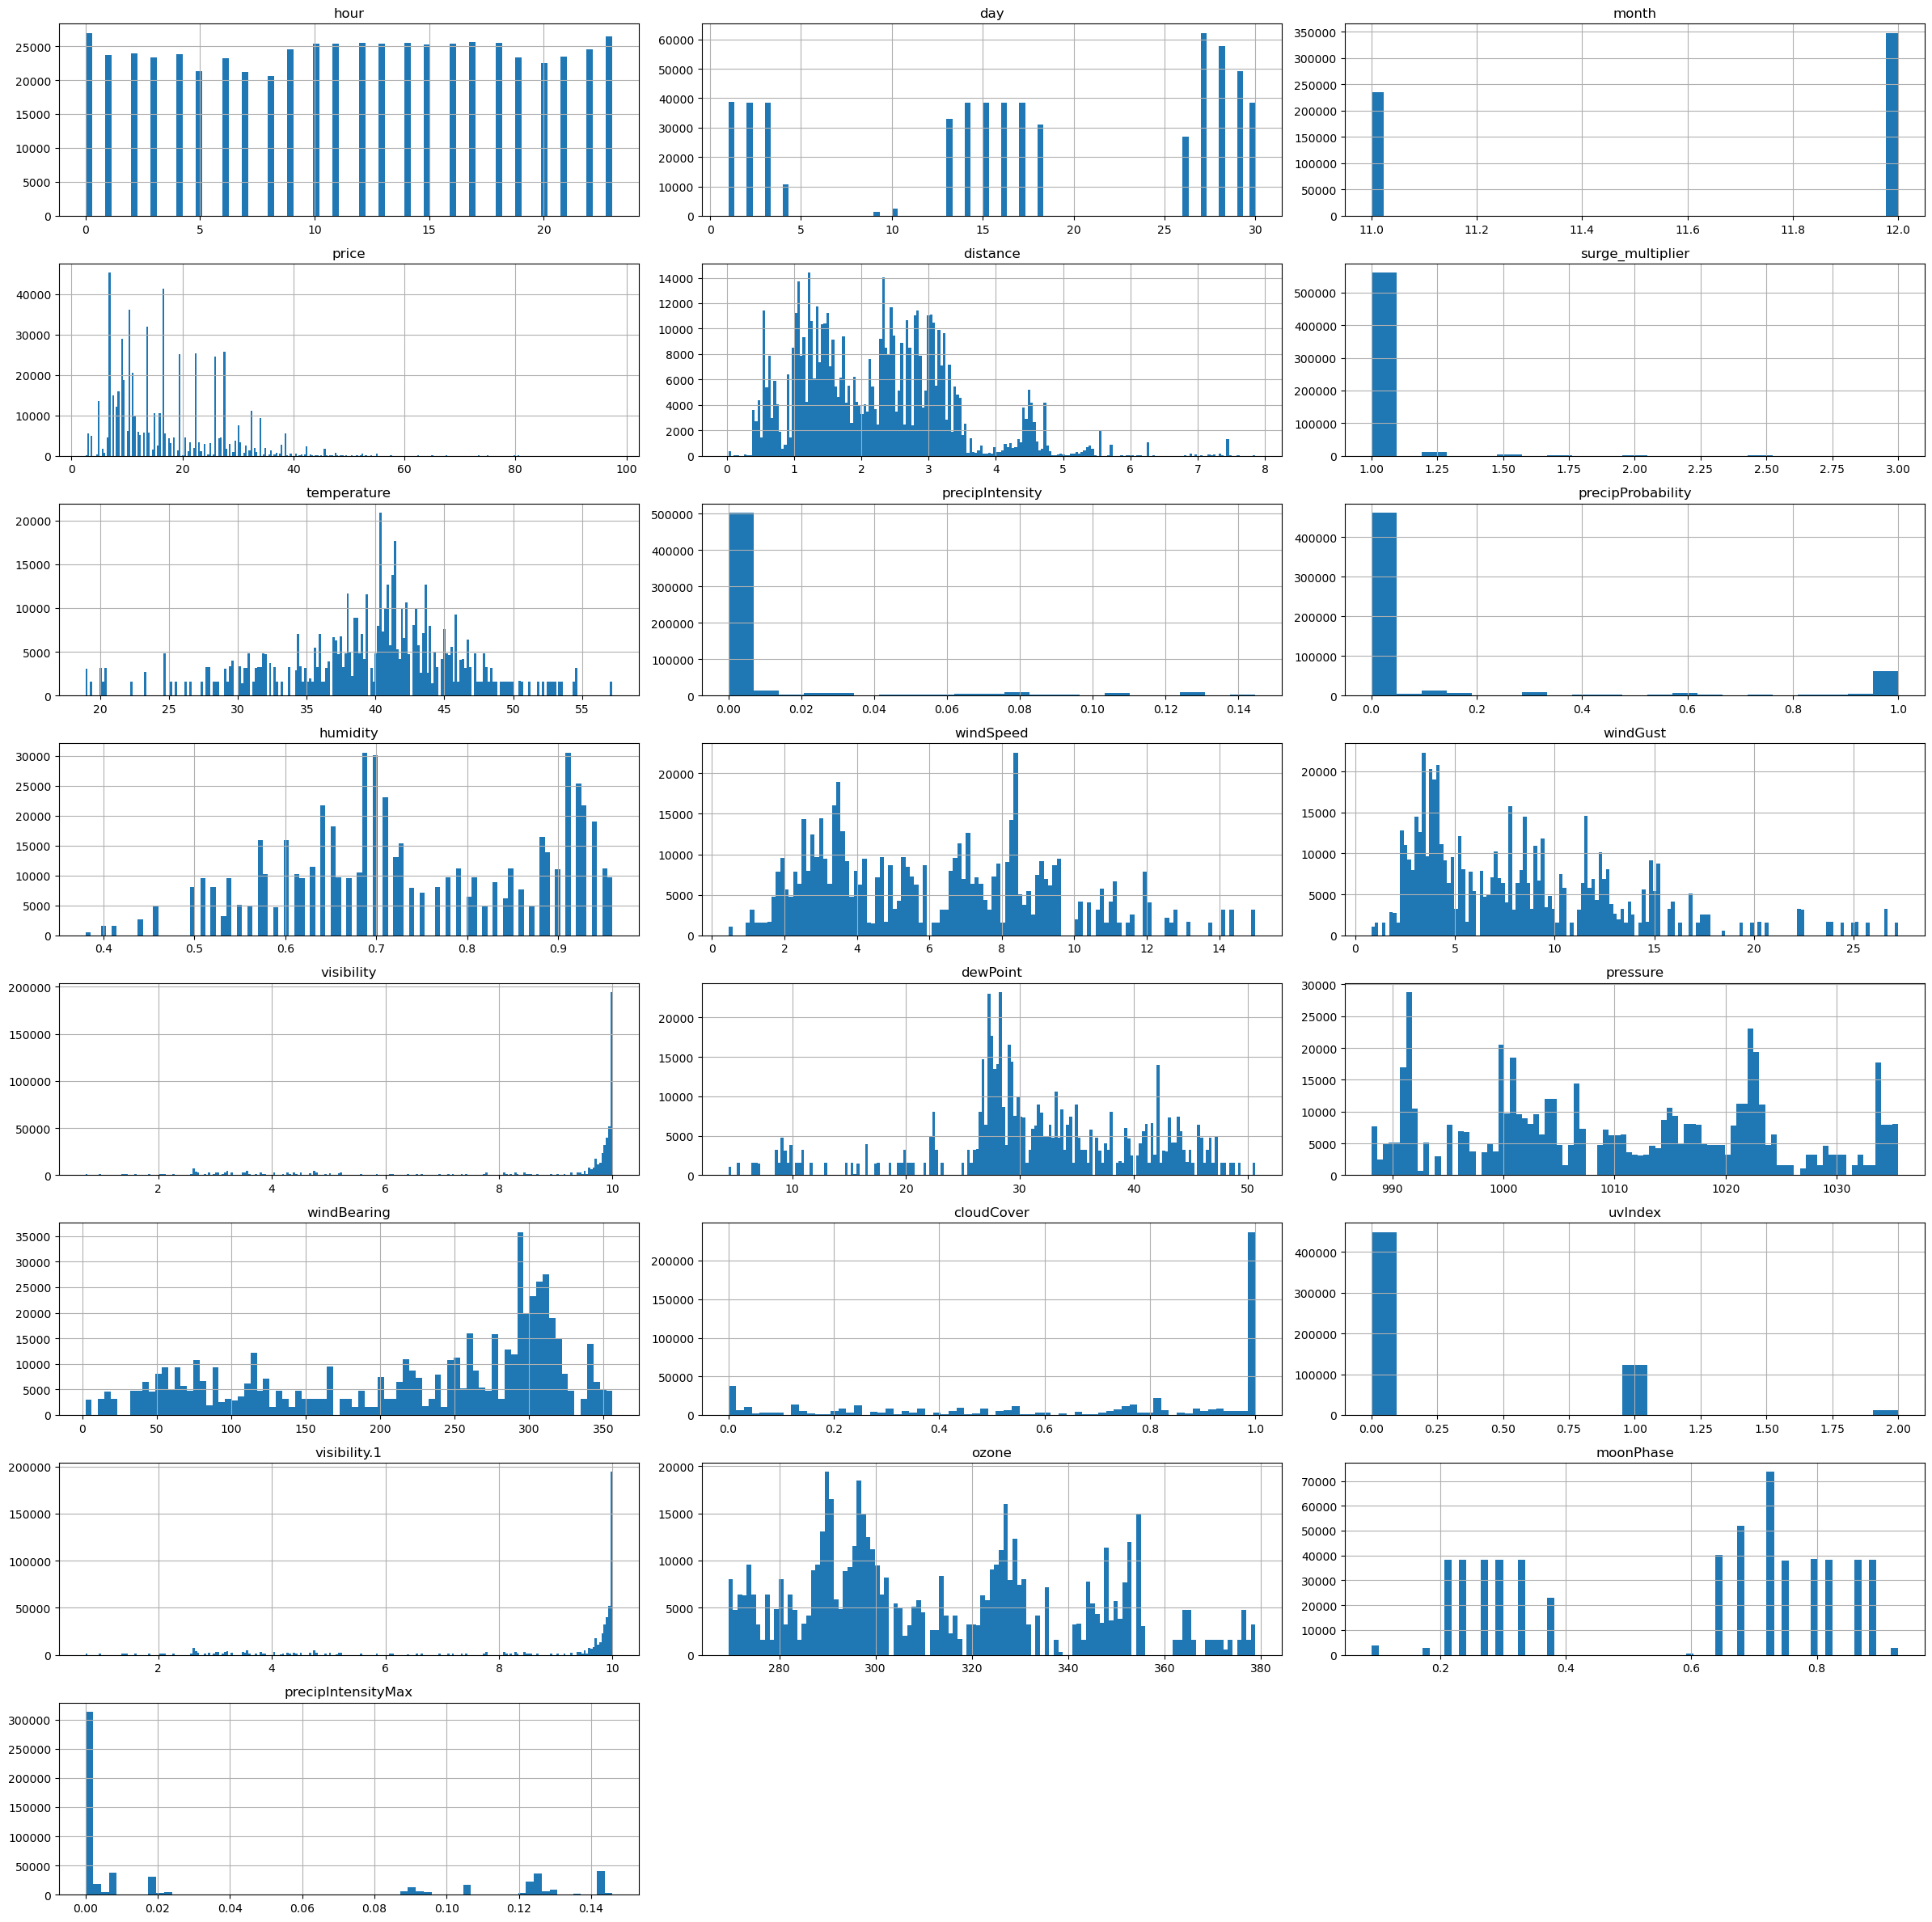

In [33]:
df.hist(bins='auto', layout=(27,3), figsize=(24,80))
plt.tight_layout()

## F. Data Preprocessing



### F.1 Encoding

Encoding dilakukan untuk mengelompokan data berdasarkan data typenya, yang bertujuan untuk memastikan bahwa data dapat diolah dan dianalisis dengan benar berdasarkan data typenya.


In [34]:
# mengelompokan kolom yang bertipedata object dan juga numerik dalam variabel berbeda
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
object_columns

['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary']

In [35]:
#Melihat isi variabel object_columns
df[object_columns].nunique()

source           12
destination      12
cab_type          2
product_id       12
name             12
short_summary     9
dtype: int64

Dalam development machine learning ini, model Linear regression bekerja dengan baik dengan data numerik, dan variabel kategori atau objek perlu diubah menjadi format yang dapat diolah oleh model. 

maka dari itu selanjutnya kolom yang sebelumnya sudah di kelompokan berdasarkan tipe data object akan masuk kedalam variabel "encoded_df" yang artinya akan di encoding yaitu diubah menjadi tipe data numerik, dan kolom yang sudah masuk kedalam kategori numeric_columns akan masuk kedalam variabel "not_encoded_df" dan tidak dilakukan perubahan.

In [36]:
encoded_df = df[object_columns]
not_encoded_df = df[numeric_columns]

*Note : Gunakan Sintaks berikut df.to_pickle('df.pkl') jika ingin menyimpan dataset yang sudah melalui tahap data cleaning.

jika tidak ingin menyimpan dataset tersebut, bisa langsung lanjut ke proses selanjutnya.

In [37]:
#df.to_pickle('df.pkl')

In [38]:
#mengubah isi dari variabel encoded_df menjadi tipedata numerik dengan fungsi pd.get_dummies,,,,,.astype('int')
encoded_df = pd.get_dummies(encoded_df).astype('int')
df = pd.concat([not_encoded_df, encoded_df], axis = 1)
df.sample(3)

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
583988,12,1,12,10.00,3.10,1.00,32.07,0.00,0.00,0.79,4.94,4.94,9.71,26.45,1021.71,325,0.37,0,9.71,279.60,0.82,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
581390,4,14,12,13.50,2.14,1.00,31.10,0.00,0.00,0.71,1.66,2.42,9.85,22.68,1034.90,200,1.00,0,9.85,310.10,0.21,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
83143,15,28,11,11.00,3.19,1.00,41.24,0.00,0.00,0.60,8.39,12.38,10.00,28.42,991.46,297,0.74,1,10.00,351.90,0.72,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### F.2 Normalization

Normalisasi adalah proses mengubah atau menyesuaikan skala dari variabel-variabel dalam suatu dataset sehingga memiliki rentang nilai yang seragam atau terstandarisasi.

karena sebelumnya ditemui Outlier dalam dataset dan diputuskan kalau data tersebut valid, maka diperlukan metode normalisasi data yang toleran terhadap outlier, maka dari itu disini digunakan RobustScaler untuk metode penormalisasian data.

In [39]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on your data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for easier analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [40]:
scaled_df.head()

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,-0.25,-0.07,0.00,-0.67,-1.06,0.00,0.26,0.00,0.00,-0.12,0.56,0.23,0.08,0.17,0.55,-1.12,-0.17,0.00,0.08,-0.05,-0.78,1.39,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,-0.83,0.71,-1.00,-0.22,-1.06,0.00,0.43,0.13,1.00,0.96,1.22,0.60,-3.10,1.02,-0.26,-0.93,0.27,0.00,-3.10,-0.36,-0.08,1.41,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,-0.92,0.79,-1.00,-0.52,-1.06,0.00,-0.30,0.00,0.00,0.17,0.29,-0.01,0.08,0.02,-0.80,-0.09,-1.27,0.00,0.08,0.25,0.00,1.16,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-0.67,0.93,-1.00,0.89,-1.06,0.00,-0.85,0.00,0.00,0.08,-0.12,-0.28,0.08,-0.40,0.18,0.30,-1.32,0.00,0.08,-0.36,0.14,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-0.75,0.86,-1.00,-0.37,-1.06,0.00,-0.43,0.00,0.00,-0.04,0.65,0.23,0.08,-0.21,-0.52,0.26,-0.62,0.00,0.08,1.05,0.08,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


Karena ada tahapan Model Infernce nantinya, kita dapat menyimpan data yang sudah di normalisasi dan di encoding, untuk sselanjutnya dimanipulasi di tahapan model inference.

gunakan sintaks dibawah jika ingin menyimpan data dari scaled_df

In [41]:
scaled_df.to_pickle('scaled_df.pkl')

#### Train-Dev-Test

training data adalah bagian kunci dalam pengembangan model machine learning. Tujuan utama dari pelatihan data adalah untuk memberikan model informasi dan pola dari data yang diberikan sehingga model dapat belajar dan membuat prediksi atau keputusan yang akurat pada data baru yang belum pernah dilihat sebelumnya.

dalam develop project ini dilakukan metode self-training, self-training sediri mengacu pada pendekatan di mana model belajar dari data yang telah dihasilkan oleh model itu sendiri. 

metode persebaran data untuk self-training pada development model ini adalah menggunakan
pembagian klasik (70-80% untuk pelatihan, 10-15% untuk validasi, dan 10-15% untuk pengujian.)


In [42]:
# Pembagian data (70% train, 15% validation, 15% test)
train_data, temp_data = train_test_split(scaled_df, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Pembagian Features dan Target untuk Setiap Subset:
X_train = train_data.drop(columns='price')
y_train = train_data['price']

X_validation = validation_data.drop(columns='price')
y_validation = validation_data['price']

X_test = test_data.drop(columns='price')
y_test = test_data['price']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

## G.  Pendefinisian Model

dalam project ini model yang akan dipakai adalah Linear Regression sesuai dengan objektif dari project ini, tentunya kami juga melakukan perbandingan dengan sebuah model lain yang prosesnya akan dilakukan dibawah.

Penjelasan :

- selain karena objektif dari instruksi Final Project 1, pemilihan arsitektur model Linear Regression didasari dari objektif yang ingin digapai yaitu adalah prediksi harga untuk layanan Rideshare dari dataset yang ada, Linear Regression adalah salah satu model yang tepat untuk tujuan tersebut.
- Penggunaan Arsitektur model Linear Regression digunakan juga untuk memodelkan hubungan linier antara satu atau lebih variabel independen (features) dan variabel dependen (target), dimana dari dataset yang ada sangat cocok dengan kondisi tersebut. Maka dari itu Model Linear Regression digunakan pada project ini.
- Dalam Linear Regression pemilihan nilai Hyperparameter tidak dibutuhkan. Model Linear Regression memiliki parameter yang dapat disesuaikan (bukan hyperparameter) yang mempengaruhi perilaku model, tetapi biasanya model ini tidak memerlukan penyetelan parameter secara khusus seperti pada algoritma yang lebih kompleks.

In [44]:
model = LinearRegression()


## H. Pelatihan Model

pelatihan model dilakukan oleh mesin menggunakan model yang sudah ditentukan yaitu model Linear Regression

In [45]:
model.fit(X_train, y_train)

LinearRegression()

## I. Evaluasi Model

Evaluasi model menunjukan performa model linear regression dengan menggunakan Mean Squared Error sebagai acuannya (Tingkat Kesalahan Model). Juga dilakukan perbandingan berdasarkan tingkat kesalahan model dengan model KNN.

- Validasi Model 

In [46]:
y_pred_validation = model.predict(X_validation)
mse_validation = mean_squared_error(y_validation, y_pred_validation)
print("Mean Squared Error (Validation):", mse_validation)


Mean Squared Error (Validation): 0.03537625435999488


- pengujian model 

In [47]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test):", mse_test)

Mean Squared Error (Test): 0.035197503780696415


Bukti dalam bentuk Visualisasi

note: garis pada plot tidak terlihat atau mungkin terlihat sangat kecil karena hanya memiliki satu nilai loss untuk setiap set data (pelatihan dan validasi) maka dari itu lebih baik dilihat dari tingkat kesalahan model saja melalui skor MSE.

In [48]:
# Hitung dan simpan loss pada set data pelatihan dan validasi
loss_train = mean_squared_error(y_train, y_pred_train)
loss_validation = mean_squared_error(y_validation, y_pred_validation)

# Menyimpan nilai loss
training_losses = [loss_train]
validation_losses = [loss_validation]

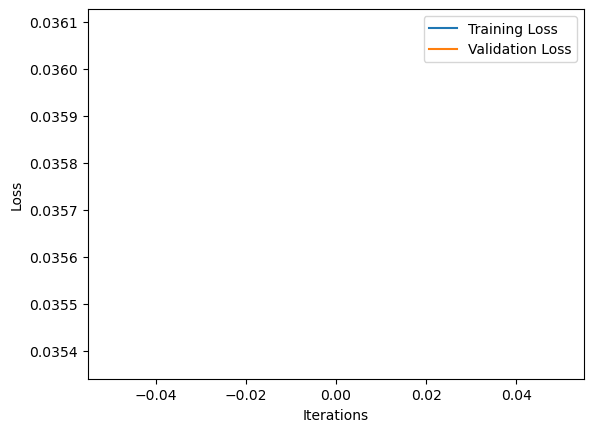

In [49]:
# Visualisasi (Learning Curve)
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perbadingan dengan model lain


In [50]:
## menggunakan model KNN

# Inisialisasi model
knn_model = KNeighborsRegressor()

# Pelatihan model
knn_model.fit(X_train, y_train)

# Evaluasi model
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("MSE (K-Nearest Neighbors):", mse_knn)


MSE (K-Nearest Neighbors): 0.04397570942714692


* NOTE : Pada development project ini didapati hasil penggunaan model linearRegression mendapatkan MSE lebih baik dibandingkan penggunaan Model KNN

## Dalam Hal ini Model Selesai di Develop, untuk tahapan model inference dan pengambilan kesimpulan dilakukan selanjutnya

Model dapat disimpan dengan sintaks berikut untuk selanjutnya digunakan pada tahapan deployment:

In [51]:

joblib.dump(model, 'model.pkl')


['model.pkl']

## J. Model Inference


Model inference dilakukan dengan data berbeda, dalam project ini model inference juga dilakukan pada tahap Deployment dimana model akan diakses menggunakan aplikasi lain berbasis web.

- namun untuk contoh pengaplikasian sederhananya dilampirkan juga sebagai berikut:

### J.1 Manipulasi Data untuk Model Inference

In [52]:
# melihat kolom fitur untuk melakukan manipulasi data baru untuk testing
# data dari X_train perlu dilakukan perubahan seperti awal untuk digunakan pada model yang telah dibuat
X_train.sample()

,hour,day,month,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
48363,0.00,0.71,-1.00,0.75,0.00,0.81,0.03,0.94,0.83,-0.27,-0.38,-4.00,1.22,-0.98,-0.31,0.27,0.00,-4.00,0.21,0.00,1.55,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


- Karena Data yang sudah bersih melalui data cleaning dan Preprocessing sebelumnya sudah disave , maka kita bisa menggunakan data tersebut.

disini data tersebut dilakukan pengacakan isi kolom bertujuan agar data tersebut fresh dan tidak dikenali oleh model sebelumnya

In [53]:

# Load data yang sudah bersih dari file pkl
new_df = pd.read_pickle('scaled_df.pkl')

# Pengacakan nilai di setiap kolom secara terpisah
shuffled_data = new_df.copy()
for column in shuffled_data.columns:
    np.random.shuffle(shuffled_data[column].values)

# Tampilkan data yang sudah diacak
print("Data yang sudah diacak:")
shuffled_data.head()


Data yang sudah diacak:


,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,0.00,0.79,0.00,-0.37,-0.35,0.00,0.48,0.00,0.00,0.67,-0.68,-0.38,0.08,-0.15,1.16,-1.21,0.24,0.00,0.08,-0.47,-0.78,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.83,0.79,0.00,-0.04,0.28,0.25,-2.13,0.03,0.00,0.83,0.97,0.55,-3.00,1.13,-0.83,0.12,-0.79,0.00,-5.12,-0.51,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0.75,-1.00,-1.00,1.19,1.42,0.00,0.34,0.00,0.00,-0.46,-0.81,1.01,-1.53,1.51,0.88,-0.72,-0.14,2.00,-0.09,-0.03,-0.96,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,-0.08,-0.07,-1.00,-0.41,-0.52,0.00,-1.07,0.00,1.00,0.96,1.65,-0.46,-0.43,0.21,-0.15,-0.21,0.27,0.00,-4.07,-0.19,0.29,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,-1.00,-1.14,0.00,1.15,0.19,0.00,0.73,0.00,0.00,0.75,-0.65,-0.27,0.06,0.92,0.33,-0.74,-0.13,1.00,0.08,0.04,0.00,1.33,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


Setelah melakukan pengacakan, selanjutnya diambil sample secara acak untuk dilakukan pengujian data berbeda pada model yang telah dibuat

In [54]:
# Memilih beberapa baris secara acak sebagai data inference dari shuffled_data
# disini hanya mengambil 1 baris, namun dapat diubah sesuai kebutuhan dengan merubah value dari variabel num_samples
num_samples = 1
inference_data = shuffled_data.sample(num_samples, random_state=42)

# menghapus kolom price karena itu adalah target
inference_data = inference_data.drop(columns=['price'])

# Tampilkan data inference
print("Data Inference:")
inference_data



Data Inference:


,hour,day,month,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
204754,0.50,0.71,0.00,0.24,0.00,-0.18,0.00,0.00,0.00,-0.42,0.14,0.05,-0.38,0.59,-0.99,0.27,1.00,0.08,0.36,0.22,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


### J.2 Pengujian Model Inference:


In [55]:
# Gunakan model yang sudah dilatih untuk melakukan prediksi pada inference_data
y_pred_inference = model.predict(inference_data)

# Tampilkan hasil prediksi
print("Hasil Prediksi Harga:", y_pred_inference)


Hasil Prediksi Harga: [5.03835942e+09]


## K. Pengambilan Kesimpulan

### Berikut adalah potongan dari sesi Pengenalan project
- Objective yang ingin dicapai :
    - Memahami konsep regression dengan linear regression
    - Mampu mempersiapkan data untuk digunakan pada model linear regression
    - Dapat mengimplementasikan linear regression untuk membuat prediksi

- Hasil yang diharapkan :
    - Prediksi harga yang sesuai berdasarkan variabel yang ada pada dataset. 


### Kesimpulan

- Berdasarkan objektif yang ingin dicapai:
    - Kelompok 4 KS18 berhasil memahami konsep machine learning dari regression berupa linear regression : Model regresi linear adalah model statistik yang digunakan untuk menggambarkan hubungan linier antara satu atau lebih variabel independen (fitur) dengan variabel dependen (target) dalam hal ini digunakan untuk memprediksi harga sebagai target dari dataset Rideshare.
    - Dengan proses yang sudah dilakukan diatas membuktikan kelompok 4 KS18 Mampu mempersiapkan data untuk digunakan pada model linear regression.
    - Model Linear Regression yang telah dibuat oleh Kelompok 4 KS18 dapat digunakan untuk membuat prediksi harga dari Rideshare Uber & Lyft berdasarkan dataset yang diberikan.

- Berdasarkan hasil yang diharapkan:
    - dengan model machine learning yang telah didevelop hasil yang diharapkan dapat terpenuhi dengan baik.

-------------------------------------------------------------
Berikut Koefisien dan Intercept dari model yang telah dibuat:

In [56]:
model.coef_

array([ 5.01518764e-04, -5.80864233e-03, -8.61346698e-03,  3.54631973e-01,
        1.37277344e+00, -1.00345991e-04, -4.35752819e-02, -1.30027199e-03,
       -1.06164104e-03, -2.64750717e-03,  3.14789275e-03, -6.91345820e+10,
        8.52394546e-04, -1.18779016e-03,  1.07072471e-03, -2.08655408e-03,
       -1.20072430e-03,  6.91345820e+10, -3.79745681e-05, -4.55372409e-03,
        2.46570947e-05, -1.76000888e+09, -1.76000888e+09, -2.66008548e+09,
       -2.66008548e+09, -1.76000888e+09, -2.66008548e+09, -2.66008548e+09,
       -1.76000888e+09, -2.66008548e+09, -2.66008548e+09, -1.76000888e+09,
       -1.76000888e+09,  1.02780045e+09,  1.02780045e+09,  1.27723853e+08,
        1.27723853e+08,  1.02780045e+09,  1.27723853e+08,  1.27723853e+08,
        1.02780045e+09,  1.27723853e+08,  1.27723853e+08,  1.02780045e+09,
        1.02780045e+09, -8.35565728e+08, -2.17225810e+09,  1.78624858e+08,
       -6.79687392e+08,  1.46782760e+08, -6.97099990e+08, -1.51015823e+08,
       -2.52461387e+09, -

In [57]:
model.intercept_

5002185470.966227

In [58]:
X_train.columns

Index(['hour', 'day', 'month', 'distance', 'surge_multiplier', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre Dist